# **API HH**

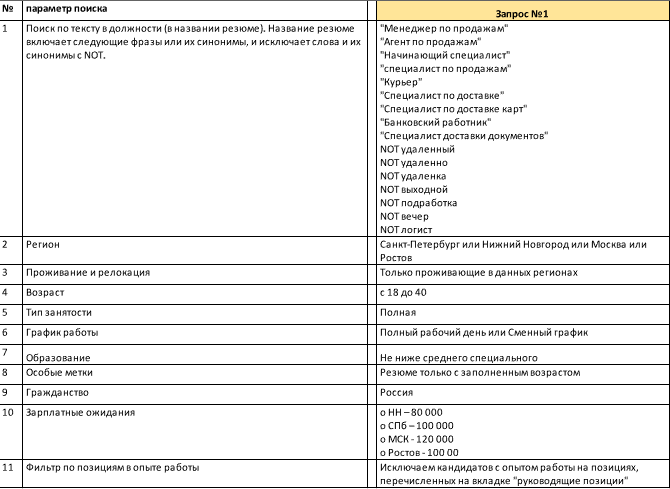

In [1]:
import requests
import json
import time

In [ ]:
def get_resumes(page = 0):

    params = {
        'text':'''POSITION:("Менеджер по продажам" OR "Агент по продажам" OR "Начинающий специалист"
                          OR"специалист по продажам" OR "Курьер" OR "Специалист по доставке"
                          OR "Специалист по доставке карт" OR "Банковский работник" OR"Специалист доставки документов")
                          AND NOT
                          POSITION:("удаленный" OR "удаленно" OR "удаленка" OR "выходной" OR "подработка" OR "вечер" OR "логист")
                          AND NOT
                          WORKPLACE_POSITION:("руководитель" OR "директор" OR "начальник"
                          OR "предприниматель" OR"управляющий" OR "управляющая" OR "Заместитель директора"
                          OR "Заместитель директора магазина" OR "Заместитель генерального директора" OR "Заместитель директора"
                          OR "Личный помощник руководителя" OR "Заместитель заведующего складом" OR "Заместитель руководителя отдела гм"
                          OR "Заместитель заведующего" OR "Заведующий производством" OR "Ассистент-помощник директора, PR-менеджер"
                          OR "управляющая магазина" OR "Заместитель генерального директора по развитию" OR "Заместитель исполнительного директора"
                          OR "Заместитель управляющего магазином" OR "Управляющая магазином" OR "Собственник франшизы"
                          OR "Заведующий магазином" OR "Заместитель управляющего отелем" OR "Head of sales"
                          OR "Зместитель директора по продажам" OR "Заместитель руководителя торгового отдела"
                          OR "Заместитель регионального управляющего" OR "зам. генерального директора"
                          OR "Заместитель начальника отдела снабжения" OR "Заведующий складом"
                          OR "Заместитель управляющего филиалом" OR "Заместитель начальника почтового отделения"
                          OR "управляющая проектами" OR "управляющий проектами"
                          OR "Администратор/управляющая"
                          OR "зам. начальника производства" OR "Руководител" OR "Заместитель гольф директора"
                          OR "Заместитель директора склада" OR "Администратор гостиницы"
                          OR "Заместитель руководителя по продажам запасных частей"
                          OR "Управляющая салоном" OR "Управляющая магазина/кофейни"
                          OR "Заместитель начальника отдела дополнительного оборудования"
                          OR "Заместитель руководителя административного департамента" OR "Зам. Руководителя салона"
                          OR "Менеджер проекта" OR "Продюсер" OR "Заместитель начальника участка"
                          OR "Заведующая" OR "Зам. руководителя проекта"
                          OR "Заместитель управляющего" OR "Заместитель директора Департамента по работе с клиентами"
                          OR "Главный инженер-заместитель начальника дистанции" OR "Sales director"
                          OR "Заместитель директора по маркетингу" OR "National Key Account Manager"
                          OR "Региональный менеджер" OR "Региональный менеджер по продажам"
                          OR "Администратор склада" OR "Заместитель начальника отдела благоустройства"
                          OR "Территориальный менеджер")
                           ''',
        'area': ['1', '2', '66', '76'],
        'relocation' : 'living',
        'age_from': 18,
        'age_to' : 40,
        'label' : 'only_with_age',
        'employment' : 'full',
        'shedule' : ['fullDay', 'shift'],
        'citizenship' : 113,
        'salary_from' : 80000,
        'salary_to' : 120000,
        'educational_levels' : ['secondary', 'special_secondary', 'unfinished_higher', 'higher', 'bachelor', 'master', 'candidate', 'doctor'],
        'page': page,
        'per_page': 100,
        'period' : '1'}

    access_token = 'Поменять на собственный токен, полученный при регистрации'
    headers = {
              'Authorization': f'Bearer {access_token}'
              }
    req = requests.get('https://api.hh.ru/resumes', headers=headers, params=params)
    data = req.content.decode()
    #req.close()
    return data

js_objs = []

for page in range(0, 3):
    js_obj = json.loads(get_resumes(page))
    js_objs.extend(js_obj["items"])
    if (js_obj['pages'] - page) <= 1:
        break
    time.sleep(0.25)

if js_objs:
    print('Найдено резюме: ', js_obj['found'])
else:
    print('Резюме не найдены.')
print('Готово')

Найдено резюме:  3952
Готово


In [51]:
#Получить таблицу
import pandas as pd
df = pd.DataFrame(js_objs)
df.head(5)

,last_name,first_name,middle_name,title,created_at,updated_at,area,age,gender,salary,...,alternate_url,id,download,platform,education,experience,favorited,viewed,marked,last_negotiation
0,None,None,None,Начинающий специалист,2020-06-18T17:12:45+0300,2025-02-27T22:27:42+0300,"{'id': '66', 'name': 'Нижний Новгород', 'url':...",21,"{'id': 'female', 'name': 'Женский'}",None,...,https://hh.ru/resume/68697a5a000810a6b100000d3...,68697a5a000810a6b100000d3c3463386f5555,{'pdf': {'url': 'https://api.hh.ru/resumes/686...,{'id': 'headhunter'},"{'level': {'id': 'unfinished_higher', 'name': ...","[{'start': '2023-03-21', 'end': '2024-06-21', ...",False,False,False,None
1,None,None,None,Начинающий специалист,2025-02-27T22:26:41+0300,2025-02-27T22:27:30+0300,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",19,"{'id': 'male', 'name': 'Мужской'}",None,...,https://hh.ru/resume/0e311659000e7cd4ad00000d3...,0e311659000e7cd4ad00000d3c696636446b54,{'pdf': {'url': 'https://api.hh.ru/resumes/0e3...,{'id': 'headhunter'},"{'level': {'id': 'secondary', 'name': 'Среднее...",[],False,False,False,None
2,None,None,None,"Руководитель направления, менеджер проекта, ве...",2025-02-18T18:37:16+0300,2025-02-27T22:27:07+0300,"{'id': '1', 'name': 'Москва', 'url': 'https://...",37,"{'id': 'male', 'name': 'Мужской'}",None,...,https://hh.ru/resume/6f779560000e70ec0d00000d3...,6f779560000e70ec0d00000d3c596257706631,{'pdf': {'url': 'https://api.hh.ru/resumes/6f7...,{'id': 'headhunter'},"{'level': {'id': 'higher', 'name': 'Высшее'}, ...","[{'start': '2022-09-01', 'end': None, 'company...",False,False,False,None
3,None,None,None,Начинающий специалист,2024-08-30T03:51:16+0300,2025-02-27T22:27:04+0300,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",22,"{'id': 'male', 'name': 'Мужской'}","{'amount': 100000, 'currency': 'RUR'}",...,https://hh.ru/resume/e61466bb000da95cbb00000d3...,e61466bb000da95cbb00000d3c6b484e4e4a71,{'pdf': {'url': 'https://api.hh.ru/resumes/e61...,{'id': 'headhunter'},"{'level': {'id': 'special_secondary', 'name': ...","[{'start': '2023-01-01', 'end': '2024-09-01', ...",False,False,False,None
4,None,None,None,Менеджер по продажам,2020-08-09T14:16:00+0300,2025-02-27T22:27:03+0300,"{'id': '1', 'name': 'Москва', 'url': 'https://...",27,"{'id': 'female', 'name': 'Женский'}","{'amount': 100000, 'currency': 'RUR'}",...,https://hh.ru/resume/4cf0d97b000835c26d00000d3...,4cf0d97b000835c26d00000d3c357a74506972,{'pdf': {'url': 'https://api.hh.ru/resumes/4cf...,{'id': 'headhunter'},"{'level': {'id': 'bachelor', 'name': 'Бакалавр...","[{'start': '2023-06-08', 'end': '2024-09-13', ...",False,True,False,None


# **2-й Способ**

Поиск с помощью параметров

```
'text' : ['элемент 1','элемент 2','элемент 3']
'text.logic' : ['any', 'except','except'],
'text.field' : ['title','title', 'experience_position'],
'text.period' : ['','','']
```

К первому элементу поля `'text'` будут применяться первые элементы остальных полей. Ко второму элементу поля `'text'`-  вторые элементы и т.д.

In [ ]:
def get_resumes(page = 0):

    params = {
              'text': [
                        '"Менеджер по продажам" "Агент по продажам"\
                         "Начинающий специалист" "специалист по продажам"\
                         "Курьер" "Специалист по доставке" "Специалист по доставке карт"\
                         "Банковский работник" "Специалист доставки документов"',

                       '"удаленный" "удаленно" "удаленка" "выходной" "подработка" "вечер" "логист"',

                       '"руководитель" "директор" "начальник" "предприниматель"\
                       "управляющий" "управляющая" "Заместитель директора"\
                       "Заместитель директора магазина" "Заместитель генерального директора"\
                       "Заместитель директора" "Личный помощник руководителя"\
                       "Заместитель заведующего складом" "Заместитель руководителя отдела гм"\
                       "Заместитель заведующего" "Заведующий производством" "Ассистент-помощник директора, PR-менеджер"\
                       "управляющая магазина" "Заместитель генерального директора по развитию" "Заместитель исполнительного директора"\
                       "Заместитель управляющего магазином" "Управляющая магазином" "Собственник франшизы"\
                       "Заведующий магазином" "Заместитель управляющего отелем" "Head of sales"\
                       "Зместитель директора по продажам" "Заместитель руководителя торгового отдела"\
                       "Заместитель регионального управляющего" "зам. генерального директора"\
                       "Заместитель начальника отдела снабжения" "Заведующий складом"\
                       "Заместитель управляющего филиалом" "Заместитель начальника почтового отделения"\
                       "управляющая проектами" "управляющий проектами"\
                       "Администратор/управляющая" "зам. начальника производства"\
                       "Руководител" "Заместитель гольф директора" "Заместитель директора склада"\
                       "Администратор гостиницы" "Заместитель руководителя по продажам запасных частей"\
                       "Управляющая салоном" "Управляющая магазина/кофейни"\
                       "Заместитель начальника отдела дополнительного оборудования"\
                       "Заместитель руководителя административного департамента" "Зам. Руководителя салона"\
                       "Менеджер проекта" "Продюсер" "Заместитель начальника участка"\
                       "Заведующая" "Зам. руководителя проекта"\
                       "Заместитель управляющего" "Заместитель директора Департамента по работе с клиентами"\
                       "Главный инженер-заместитель начальника дистанции" "Sales director"\
                       "Заместитель директора по маркетингу" "National Key Account Manager"\
                       "Региональный менеджер" "Региональный менеджер по продажам"\
                       "Администратор склада" "Заместитель начальника отдела благоустройства"\
                       "Территориальный менеджер"'
                       ],
              'text.logic' : ['any', 'except','except'],
              'text.field' : ['title','title', 'experience_position'],
              'text.period' : ['','',''],
              'area': ['1', '2', '66', '76'],
              'relocation' : 'living',
              'age_from': 18,
              'age_to' : 40,
              'label' : 'only_with_age',
              'employment' : 'full',
              'shedule' : ['fullDay', 'shift'],
              'citizenship' : 113,
              'salary_from' : 80000,
              'salary_to' : 120000,
              'educational_levels' : ['secondary', 'special_secondary', 'unfinished_higher', 'higher', 'bachelor', 'master', 'candidate', 'doctor'],
              'page': page,
              'per_page': 100,
              'period' : '1'}

    access_token = 'Поменять на собственный токен, полученный при регистрации'
    headers = {
              'Authorization': f'Bearer {access_token}'
              }
    req = requests.get('https://api.hh.ru/resumes', headers=headers, params=params)
    data = req.content.decode()
    #req.close()
    return data

js_objs = []

for page in range(0, 3):
    js_obj = json.loads(get_resumes(page))
    js_objs.extend(js_obj["items"])
    if (js_obj['pages'] - page) <= 1:
        break
    time.sleep(0.25)

if js_objs:
    print('Найдено резюме: ', js_obj['found'])
else:
    print('Резюме не найдены.')
print('Готово')

Найдено резюме:  3951
Готово


In [49]:
#Получить таблицу
import pandas as pd
df = pd.DataFrame(js_objs)
df.head(5)

,last_name,first_name,middle_name,title,created_at,updated_at,area,age,gender,salary,...,alternate_url,id,download,platform,education,experience,favorited,viewed,marked,last_negotiation
0,None,None,None,Начинающий специалист,2020-06-18T17:12:45+0300,2025-02-27T22:27:42+0300,"{'id': '66', 'name': 'Нижний Новгород', 'url':...",21,"{'id': 'female', 'name': 'Женский'}",None,...,https://hh.ru/resume/68697a5a000810a6b100000d3...,68697a5a000810a6b100000d3c3463386f5555,{'pdf': {'url': 'https://api.hh.ru/resumes/686...,{'id': 'headhunter'},"{'level': {'id': 'unfinished_higher', 'name': ...","[{'start': '2023-03-21', 'end': '2024-06-21', ...",False,False,False,None
1,None,None,None,Начинающий специалист,2025-02-27T22:26:41+0300,2025-02-27T22:27:30+0300,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",19,"{'id': 'male', 'name': 'Мужской'}",None,...,https://hh.ru/resume/0e311659000e7cd4ad00000d3...,0e311659000e7cd4ad00000d3c696636446b54,{'pdf': {'url': 'https://api.hh.ru/resumes/0e3...,{'id': 'headhunter'},"{'level': {'id': 'secondary', 'name': 'Среднее...",[],False,False,False,None
2,None,None,None,Менеджер по работе с клиентами,2018-08-19T11:35:56+0300,2025-02-27T22:27:28+0300,"{'id': '1', 'name': 'Москва', 'url': 'https://...",37,"{'id': 'male', 'name': 'Мужской'}","{'amount': 90000, 'currency': 'RUR'}",...,https://hh.ru/resume/4b8020170005a68ef800000d3...,4b8020170005a68ef800000d3c414a75765146,{'pdf': {'url': 'https://api.hh.ru/resumes/4b8...,{'id': 'headhunter'},"{'level': {'id': 'higher', 'name': 'Высшее'}, ...","[{'start': '2022-12-01', 'end': '2024-03-01', ...",False,True,False,None
3,None,None,None,"Руководитель направления, менеджер проекта, ве...",2025-02-18T18:37:16+0300,2025-02-27T22:27:07+0300,"{'id': '1', 'name': 'Москва', 'url': 'https://...",37,"{'id': 'male', 'name': 'Мужской'}",None,...,https://hh.ru/resume/6f779560000e70ec0d00000d3...,6f779560000e70ec0d00000d3c596257706631,{'pdf': {'url': 'https://api.hh.ru/resumes/6f7...,{'id': 'headhunter'},"{'level': {'id': 'higher', 'name': 'Высшее'}, ...","[{'start': '2022-09-01', 'end': None, 'company...",False,False,False,None
4,None,None,None,Начинающий специалист,2024-08-30T03:51:16+0300,2025-02-27T22:27:04+0300,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",22,"{'id': 'male', 'name': 'Мужской'}","{'amount': 100000, 'currency': 'RUR'}",...,https://hh.ru/resume/e61466bb000da95cbb00000d3...,e61466bb000da95cbb00000d3c6b484e4e4a71,{'pdf': {'url': 'https://api.hh.ru/resumes/e61...,{'id': 'headhunter'},"{'level': {'id': 'special_secondary', 'name': ...","[{'start': '2023-01-01', 'end': '2024-09-01', ...",False,False,False,None


# **Черновик**

Цифры можно не заключать в кавычки в словаре, реквест норм их переводит в http запрос: `'citizenship' : 113`

[Дока](https://api.hh.ru/openapi/redoc#tag/Poisk-rezyume/operation/search-for-resumes)

[Поисковые запросы](https://hh.ru/article/25295)

Как передать фильтр по позициям в опыте работы - "исключить кандидатов с опытом работы на позициях, перечислнных на вкладке руководящие позиции."

Либо передавать в text, либо в какое то другое поле."
Использовать:

`POSITION:(...)  AND WORKPLACE_POSITION:(...)`

In [ ]:
#Не надо, передал напрямую в параметр text
search_phrases = [
    'Менеджер по продажам',
    'Агент по продажам',
    'Начинающий специалист',
    'специалист по продажам',
    'Курьер',
    'Специалист по доставке',
    'Специалист по доставке карт',
    'Банковский работник',
    'Специалист доставки документов'
]

iskluch_phrases = ['удаленный', 'удаленно', 'удаленка', 'выходной', 'подработка', 'вечер', 'логист']

search_str = 'POSITION:"' + '" OR "'.join(search_phrases) + '"'
iskluch_str = ' OR '.join([f'NOT !{phrase}' for phrase in iskluch_phrases])

result = f'{search_str} NOT {iskluch_str}'
print(result)

POSITION:"Менеджер по продажам" OR "Агент по продажам" OR "Начинающий специалист" OR "специалист по продажам" OR "Курьер" OR "Специалист по доставке" OR "Специалист по доставке карт" OR "Банковский работник" OR "Специалист доставки документов" NOT NOT !удаленный OR NOT !удаленно OR NOT !удаленка OR NOT !выходной OR NOT !подработка OR NOT !вечер OR NOT !логист
